In [1]:
from main_unsuper_pretrain import dataloader_ourds_train
from main_task_caption import Args_Caption
from modules.tokenization import BertTokenizer
import pickle

/home/karolwojtulewicz/miniconda3/envs/univl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
args = Args_Caption(features_dir="data", do_eval=False, task="unsup-pretrain", output_dir="out_pretrain")
args.mask_prob = 0.75
args.load_checkpoint = False
args.batch_size_val = 32
args.bottleneck_dim = 24
args.decoder_num_hidden_layers = 1
args.visual_num_hidden_layers = 2
args.bottleneck_fusion_layers = 1
args.cross_num_hidden_layers = 0
args.init_model = None
args.epochs = 400

In [3]:
tokenizer = BertTokenizer.from_pretrained(args.bert_model, do_lower_case=args.do_lower_case)
args.video_feature = pickle.load(open(args.features_path, 'rb'))
args.video_bbx_feature = pickle.load(open(args.bbx_features_path, 'rb'))
dataloader,_,_ = dataloader_ourds_train(args, tokenizer)

/home/karolwojtulewicz/code/NSVA/modules/bert-base-uncased/vocab.txt


In [4]:
batch = next(iter(dataloader))

pairs_text, pairs_mask, pairs_segment, video, video_mask, \
               pairs_masked_text, pairs_token_labels, masked_video, video_labels_index, \
               pairs_input_caption_ids, pairs_decoder_mask, pairs_output_caption_ids,task_type, bbx, bbx_mask, masked_bbx = batch

In [5]:
print(video.shape, video[0][0].shape, masked_video[0,0,:].shape, (masked_video[0, 0,:].unsqueeze(-1).shape), masked_bbx.shape)

torch.Size([32, 1, 30, 768]) torch.Size([30, 768]) torch.Size([30]) torch.Size([30, 1]) torch.Size([32, 1, 2, 30])


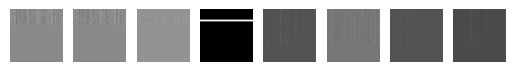

In [6]:
import numpy as np
import matplotlib.pyplot as plt
index = 6
def display_image(matrix_list):
    """
    Displays an image represented as an nxm matrix using matplotlib.
    
    Parameters:
    - matrix (list of lists): An nxm matrix representing the image.
    
    Returns:
    - None
    """
    num_images = len(matrix_list)
    
    # Create a subplot for each image
    fig, axes = plt.subplots(1, num_images)
    
    for i, matrix in enumerate(matrix_list):
        matrix = np.array(matrix)
        
        # Calculate the aspect ratio based on the shape of the matrix
        aspect_ratio = matrix.shape[1] / matrix.shape[0]
        
        if num_images == 1:
            ax = axes
        else:
            ax = axes[i]
        ax.imshow(matrix, cmap='gray', aspect=aspect_ratio)
        ax.axis('off')
    
    plt.show()

# Example usage:
# For demonstration purposes, let's use a simple 5x5 matrix.
matrix = [
    [255, 255, 255, 255, 255],
    [255, 0, 0, 0, 255],
    [255, 0, 255, 0, 255],
    [255, 0, 0, 0, 255],
    [255, 255, 255, 255, 255]
]
m_video = video*(masked_video.unsqueeze(-1) == 0)
n_video = video*(masked_video.unsqueeze(-1))
m_bbx = bbx*(masked_bbx.unsqueeze(-1) == 0)
n_bbx = bbx*(masked_bbx.unsqueeze(-1))
display_image([video[index][0].numpy(), m_video[index,0].numpy(), n_video[index,0].numpy(), masked_video[index][0].unsqueeze(-1).numpy(), bbx[index][0][0].numpy(), bbx[index][0][1].numpy(), n_bbx[index,0][0].numpy(),  m_bbx[index,0][0].numpy()])



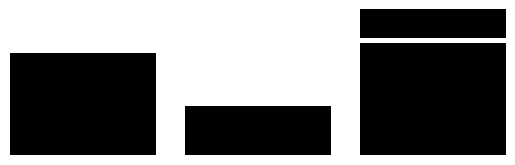

In [7]:

display_image([video_mask[index,0].unsqueeze(-1).numpy()*255, bbx_mask[index,0].unsqueeze(-1).numpy()*255, masked_video[index,0].unsqueeze(-1).numpy()*255])

In [8]:
decoder_mask = ((masked_video == 0) * video_mask).float()

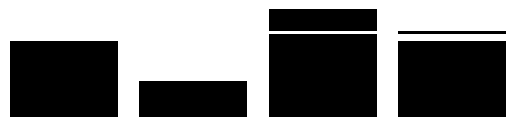

In [9]:

display_image([video_mask[index,0].unsqueeze(-1).numpy()*255, bbx_mask[index,0].unsqueeze(-1).numpy()*255, masked_video[index,0].unsqueeze(-1).numpy()*255, decoder_mask[index,0].unsqueeze(-1).numpy()])